# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how CNNs work and how to build them using Keras, its time to practice those skills a little more independently in order to build a CNN on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

In this lab you will: 

- Load images from a hierarchical file structure using an image datagenerator 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 
- Visualize and evaluate the performance of CNN models 

## Loading the Images

The data for this lab are a bunch of pictures of cats and dogs, and our task is to correctly classify a picture as one or the other. The [original dataset](https://www.kaggle.com/c/dogs-vs-cats) is from Kaggle. We have downsampled this dataset in order to reduce training time for you when you design and fit your model to the data. ⏰ It is anticipated that this process will take approximately one hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **cats_dogs_downsampled**, of this repository. 

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Load the images; be sure to also preprocess these into tensors 

train_dir = 'cats_dogs_downsampled/train'
validation_dir = 'cats_dogs_downsampled/val/'
test_dir = 'cats_dogs_downsampled/test/' 


## Designing the Model

Now it's time to design your CNN using Keras! Remember a few things when doing this: 

- You should alternate convolutional and pooling layers
- You should have later layers have a larger number of parameters in order to detect more abstract patterns
- Add some final dense layers to add a classifier to the convolutional base 
- Compile this model 

In [3]:
# Your code here; design and compile the model
from keras.preprocessing.image import ImageDataGenerator
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')


Found 2140 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Metal device set to: Apple M1


2022-08-16 15:26:39.272026: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-16 15:26:39.272295: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.


If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.** 

In [8]:
# Set the model to train 
# ⏰ This cell may take several minutes to run 
history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

Epoch 1/30


2022-08-16 15:27:53.514095: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-16 15:27:53.922552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6848 - acc: 0.5455

2022-08-16 15:28:01.154921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 8s 68ms/step - loss: 0.6848 - acc: 0.5455 - val_loss: 0.6715 - val_acc: 0.6300
Epoch 2/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6604 - acc: 0.5865 - val_loss: 0.6392 - val_acc: 0.6475
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6222 - acc: 0.6490 - val_loss: 0.6206 - val_acc: 0.6150
Epoch 4/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5754 - acc: 0.6995 - val_loss: 0.5625 - val_acc: 0.7300
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5408 - acc: 0.7210 - val_loss: 0.5252 - val_acc: 0.7400
Epoch 6/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5129 - acc: 0.7365 - val_loss: 0.5279 - val_acc: 0.7125
Epoch 7/30
100/100 [==============================] - 7s 65ms/step - loss: 0.4908 - acc: 0.7550 - val_loss: 0.5270 - val_acc: 0.7200
Epoch 8/30
100/100 [==============================] - 6s 64ms/step - loss: 0.467

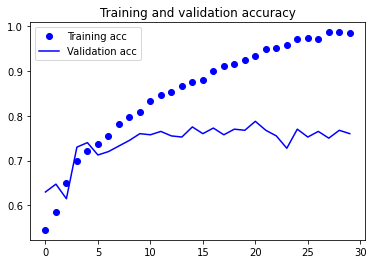

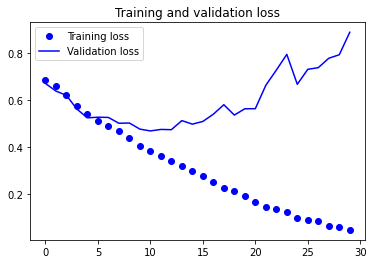

In [9]:
# Plot history
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 0:08:27.490149


## Save the Model

In [11]:
# Your code here; save the model for future reference 
model.save('cats_dogs_downsampled_data.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.

**Warning: ⏰ This process took nearly 4 hours to run on a relatively new macbook pro. As such, it is recommended that you simply code the setup and compare to the solution branch, or set the process to run overnight if you do choose to actually run the code.** 

In [12]:
# Add data augmentation to the model setup and set the model to train; 
# See warnings above if you intend to run this block of code 
# ⏰ This cell may take several hours to run 
start = datetime.datetime.now()

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

Found 2140 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 7s 74ms/step - loss: 0.7129 - acc: 0.6835 - val_loss: 0.5074 - val_acc: 0.7450
Epoch 2/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5720 - acc: 0.7095 - val_loss: 0.4860 - val_acc: 0.7725
Epoch 3/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5637 - acc: 0.7055 - val_loss: 0.4841 - val_acc: 0.7450
Epoch 4/30
100/100 [==============================] - 7s 73ms/step - loss: 0.5543 - acc: 0.7105 - val_loss: 0.4681 - val_acc: 0.7825
Epoch 5/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5362 - acc: 0.7375 - val_loss: 0.5093 - val_acc: 0.7500
Epoch 6/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5475 - acc: 0.7205 - val_loss: 0.4529 - val_acc: 0.7700
Epoch 7/30
100/100 [==============================] - 8s 75ms/step - loss: 0.5442 - acc: 0.7300 - val_loss: 0.4375 - val_acc: 0.8075
Epoch 8/30
100/100 [=======

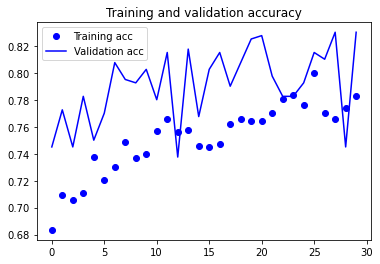

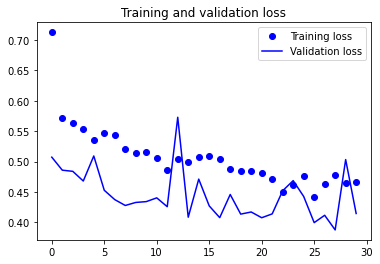

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [14]:
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed))


Training with data augmentation took a total of 0:05:05.311756


Save the model for future reference.  

In [15]:
# Save the model 
model.save('cats_dogs_downsampled_with_augmentation_data.h5')

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice. 

In [16]:
# Your code here 
# Perform a final evaluation using the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 425 images belonging to 2 classes.
20/20 [==============================] - 1s 29ms/step - loss: 0.4525 - acc: 0.7975
test acc: 0.79749995470047


## Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.